In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import classify
import torch
from torchvision import datasets, transforms
from classify import Net
import random

In [4]:
fake_positives = np.load('fake_pos.npy')#np.load('stamps_simulated.npy')
false_positives = np.load('false_pos.npy')#np.load('stamp_training_set.npy')
fake_positives.shape[0] + false_positives.shape[0]

49978

In [5]:
def pimg(arr):
    imgplot = plt.imshow(arr)
    bar = plt.colorbar()

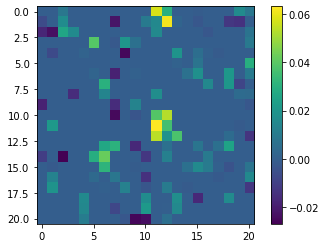

In [6]:
pimg(false_positives[0])

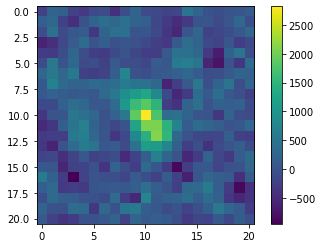

In [7]:
pimg(np.sum(fake_positives,axis=(0)))

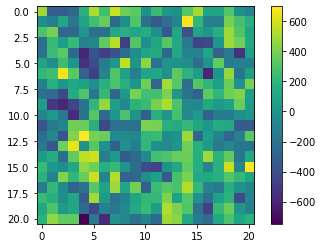

In [8]:
pimg(np.sum(false_positives,axis=(0)))

In [9]:
avg_false_positive = np.sum(false_positives,axis=(0))/false_positives.shape[0]
avg_fake_positive = np.sum(fake_positives,axis=(0))/fake_positives.shape[0]

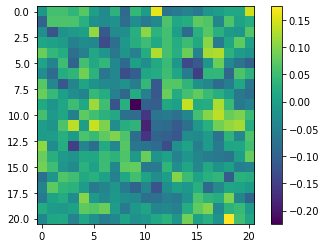

In [10]:
pimg(fake_positives[2345]-avg_fake_positive)

In [11]:
np.sum(fake_positives)

50004.450293821086

In [12]:
np.sum(false_positives)

24988.99999999999

In [13]:
model = torch.load('./kbmod_cnn.pt')
model.cpu()
model.float()
model.eval()

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=200, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=2, bias=True)
)

In [14]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
pytorch_total_params

127072

0.9992998949842476

In [16]:
def m_input(arr):
    dat = torch.tensor([[arr]])
    dat = dat.to('cpu', torch.float)
    return dat

In [17]:
def predict(img):
    val = model(m_input(img)).argmax(dim=1, keepdim=True)
    return val.item()

In [18]:
def mispredictions(imgs, correct_answer):
    wrong = []
    for idx, img in enumerate(imgs):
        if (not predict(img) == correct_answer):
            wrong.append(idx)
    return wrong

In [19]:
failed_false_positives = mispredictions(false_positives, 0)
len(failed_false_positives)

1464

In [20]:
failed_fake_positives = mispredictions(fake_positives, 1)
len(failed_fake_positives)

616

In [21]:
def plot_grid(arr):
    fig = plt.figure(figsize=(150, 150))  # width, height in inches

    for i in range(64):
        sub = fig.add_subplot(8, 8, i + 1)
        sub.imshow(np.array([arr])[0,i,:,:], interpolation='nearest')

In [22]:
def smp64(arr):
    return arr[np.random.randint(len(arr), size=64)]

In [23]:
plot_grid(smp64(fake_positives))

In [24]:
plot_grid(smp64(false_positives))

In [25]:
plot_grid([fake_positives[i] for i in failed_fake_positives])

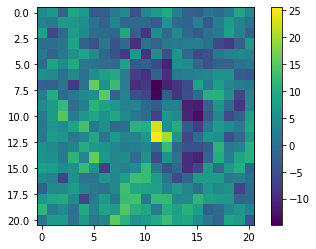

In [26]:
pimg(np.sum([fake_positives[i] for i in failed_fake_positives],axis=(0)))

In [27]:
plot_grid([false_positives[i] for i in failed_false_positives])

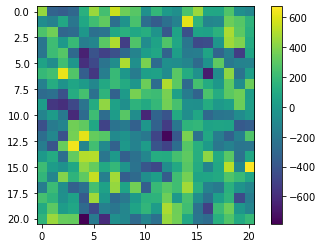

In [28]:
pimg(np.sum([false_positives[i] for i in failed_false_positives],axis=(0)))